### Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 
##### Note - 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -                                                                                          
● Get all Pokemons whose spawn rate is less than 5%                                              
● Get all Pokemons that have less than 4 weaknesses                                        
● Get all Pokemons that have no multipliers at all                                                               
● Get all Pokemons that do not have more than 2 evolutions                                         
● Get all Pokemons whose spawn time is less than 300 seconds.                                                     
`Note` - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.                         
● Get all Pokemon who have more than two types of capabilities                                          

C:\Users\pallabi.sahoo\Anaconda3\envs\myenv\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Pokemons with spawn rate less than 5%:
           name  spawn_chance
1       Ivysaur        0.0420
2      Venusaur        0.0170
4    Charmeleon        0.0120
5     Charizard        0.0031
7     Wartortle        0.0340
..          ...           ...
145     Moltres        0.0000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[65 rows x 2 columns]

Pokemons with less than 4 weaknesses:
           name               weaknesses
3    Charmander    [Water, Ground, Rock]
4    Charmeleon    [Water, Ground, Rock]
5     Charizard  [Water, Electric, Rock]
6      Squirtle        [Electric, Grass]
7     Wartortle        [Electric, Grass]
..          ...                      ...
145     Moltres  [Water, Electric, Rock]
146     Dratini     [Ice, Dragon, Fairy]
147   Dragonair     [Ice, Dragon, Fairy]
149      Mewtwo       [Bug, Ghost, Dark]
150         Mew       [Bug, Ghost, Dark]

[102 rows x 2 columns]

Pokemons with no multi

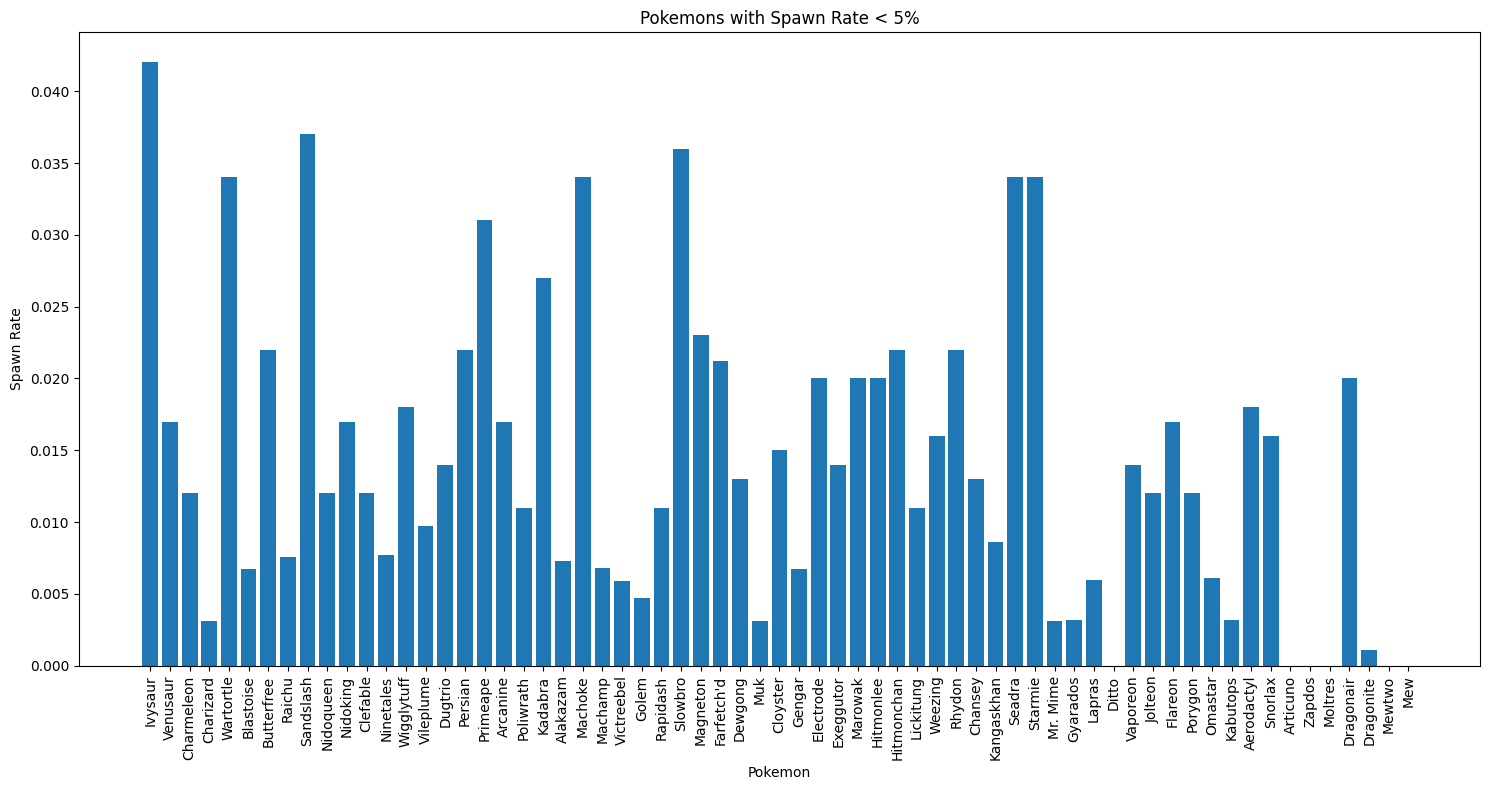

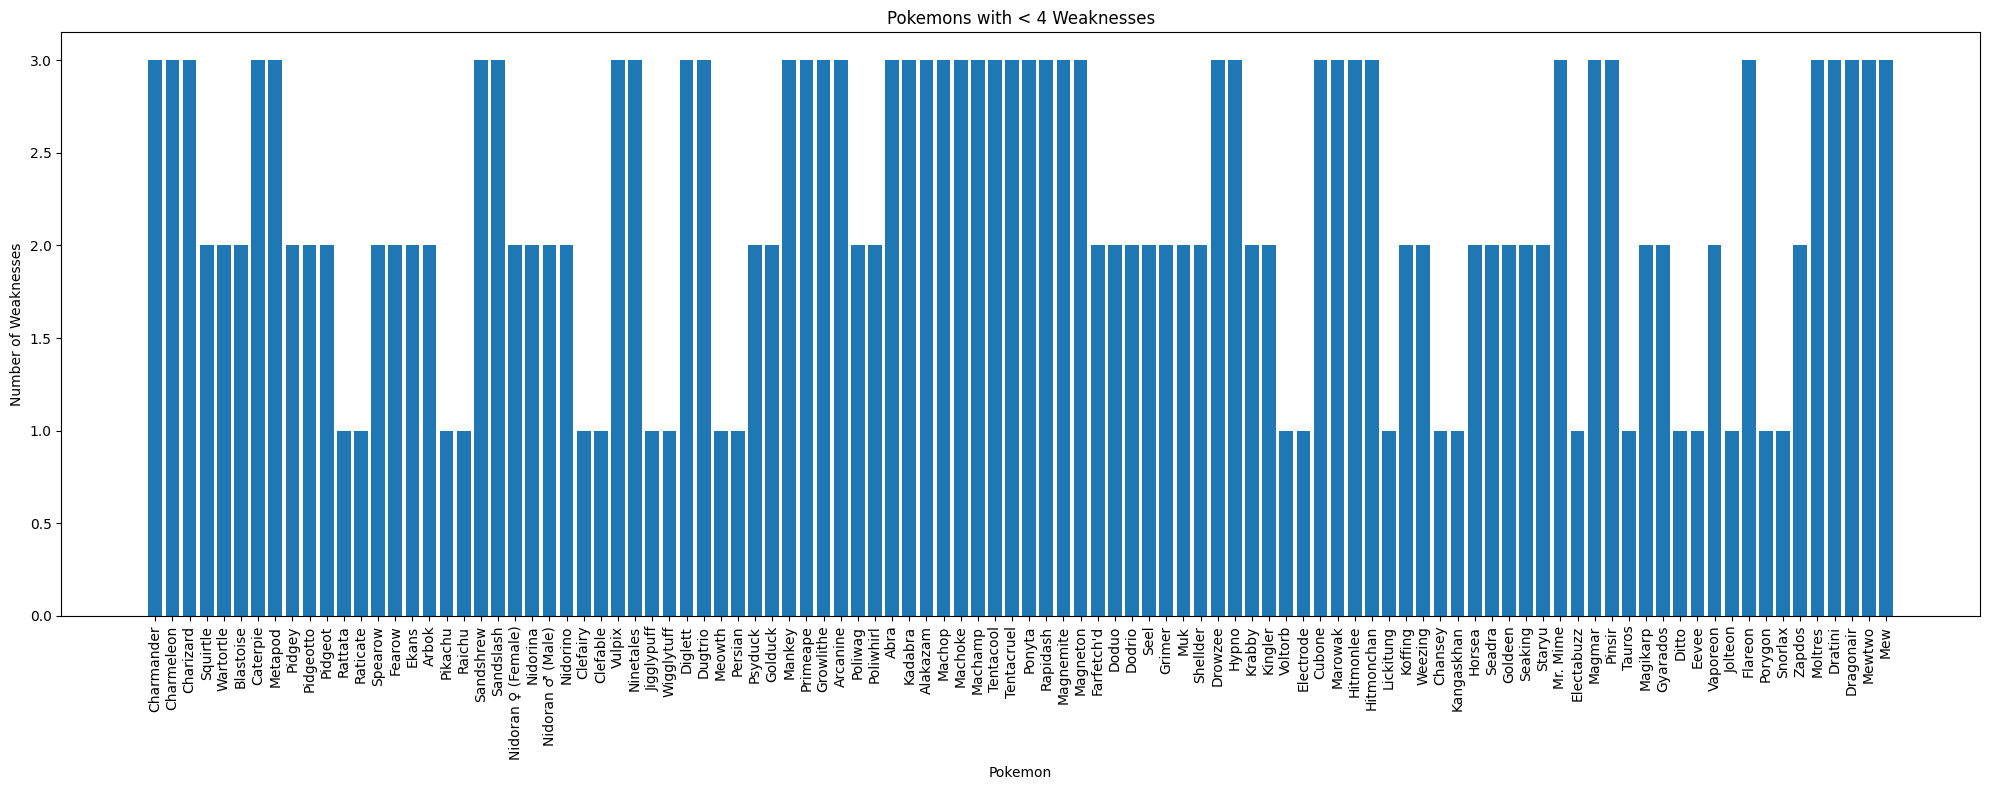

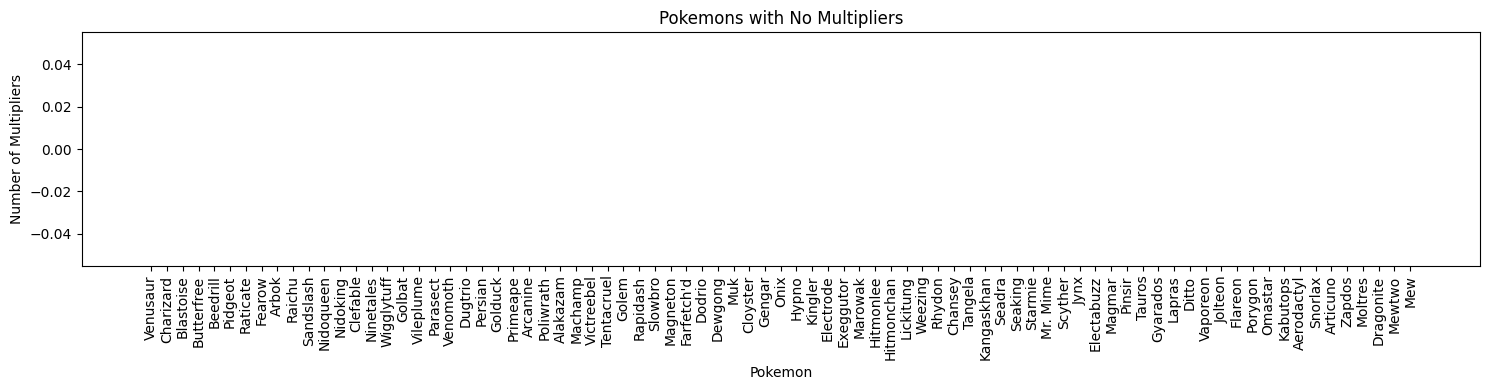

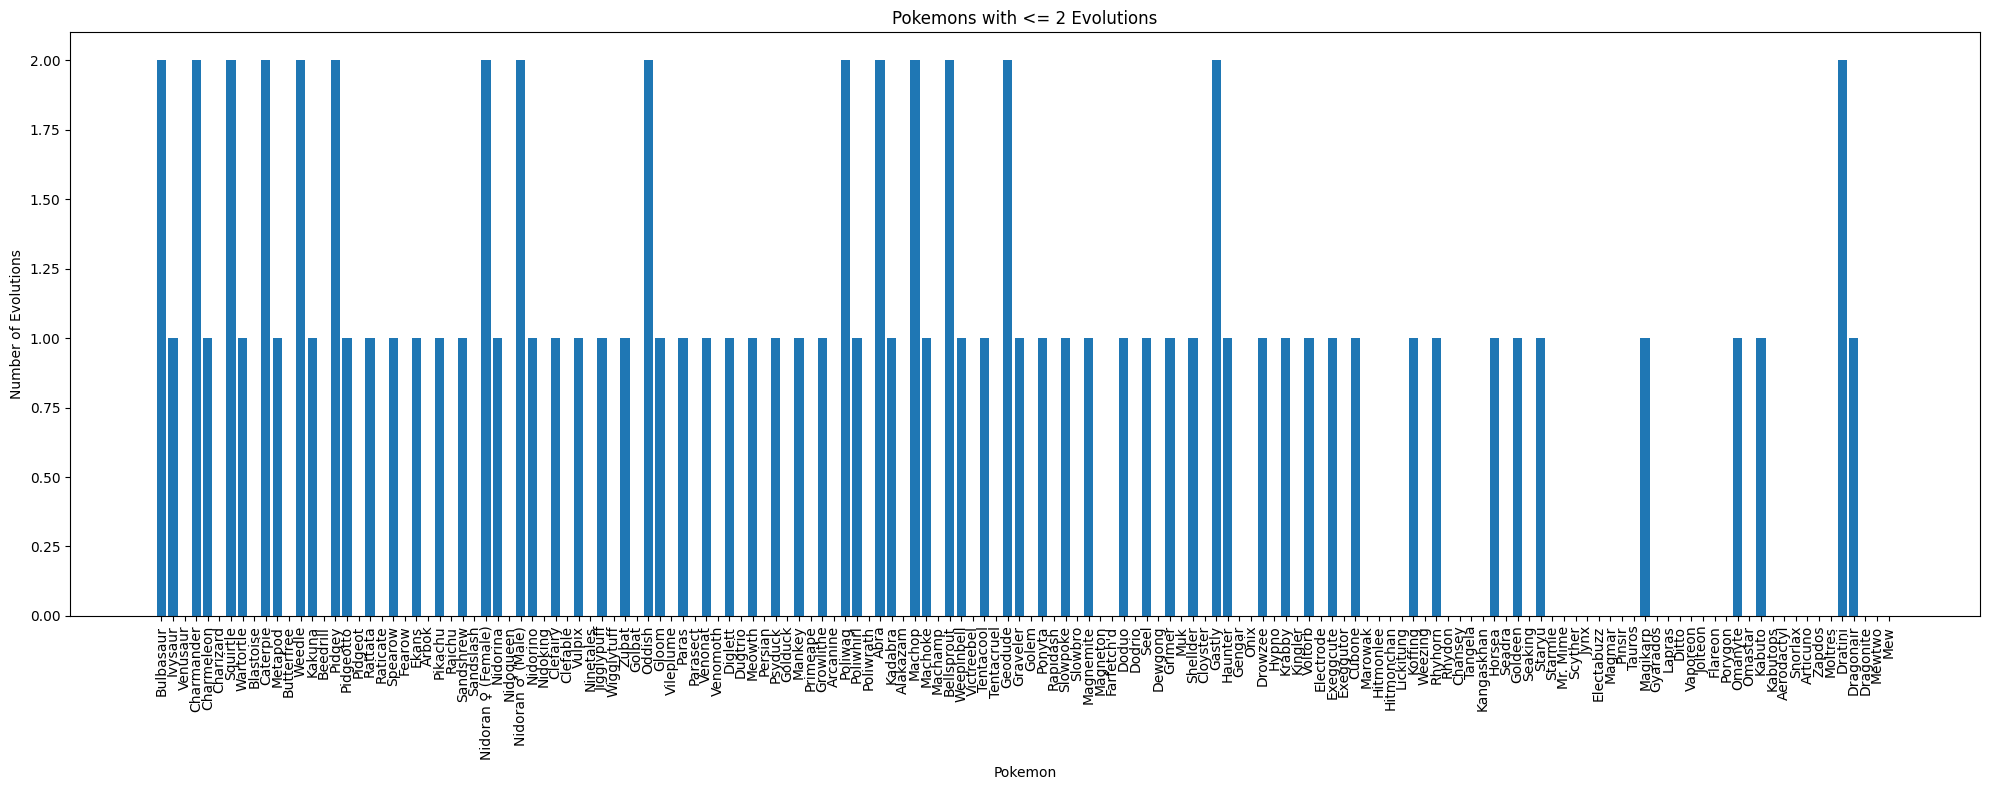

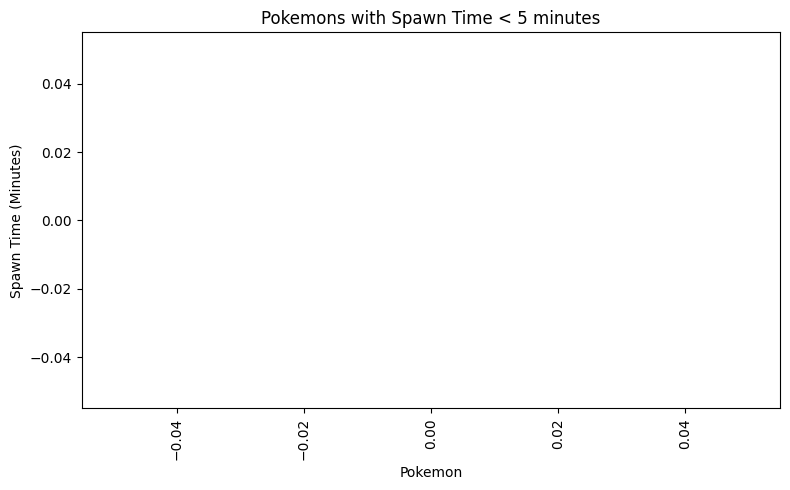

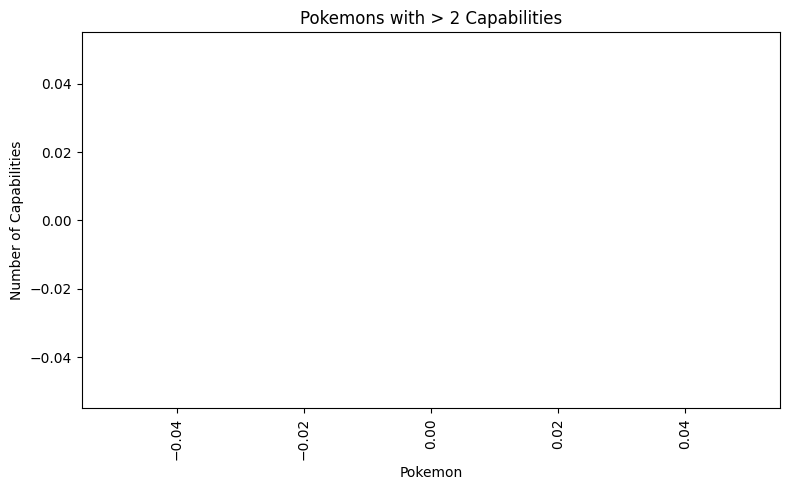

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Read the data from the provided URL
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url, verify=False)
data = response.json()

# Extract the list of Pokemons
pokemons = data["pokemon"]

# Create a DataFrame from the Pokemons data
df = pd.DataFrame(pokemons)

# Convert spawn_time column to seconds for easier analysis
try:
    df["spawn_seconds"] = pd.to_timedelta(df["spawn_time"]).dt.total_seconds()
except ValueError:
    df["spawn_seconds"] = pd.to_timedelta(df["spawn_time"], errors='coerce').dt.total_seconds()


# 1. Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 0.05
spawn_rate_filter = df["spawn_chance"] < spawn_rate_threshold
pokemons_low_spawn_rate = df[spawn_rate_filter]

# 2. Get all Pokemons that have less than 4 weaknesses
weakness_threshold = 4
weakness_filter = df["weaknesses"].apply(lambda x: len(x)) < weakness_threshold
pokemons_few_weaknesses = df[weakness_filter]

# 3. Get all Pokemons that have no multipliers at all
no_multiplier_filter = df["multipliers"].apply(lambda x: len(x) if x is not None else 0) == 0
pokemons_no_multipliers = df[no_multiplier_filter]

# 4. Get all Pokemons that do not have more than 2 evolutions
evolution_threshold = 2
evolution_filter = df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0) <= evolution_threshold
pokemons_few_evolutions = df[evolution_filter]

# 5. Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = 300
spawn_time_filter = df["spawn_seconds"] < spawn_time_threshold
pokemons_low_spawn_time = df[spawn_time_filter]

# 6. Get all Pokemon who have more than two types of capabilities
capabilities_filter = df["type"].apply(lambda x: len(x)) > 2
pokemons_multiple_capabilities = df[capabilities_filter]

# Print the results
print("Pokemons with spawn rate less than 5%:")
print(pokemons_low_spawn_rate[["name", "spawn_chance"]])

print("\nPokemons with less than 4 weaknesses:")
print(pokemons_few_weaknesses[["name", "weaknesses"]])

print("\nPokemons with no multipliers:")
print(pokemons_no_multipliers["name"])

print("\nPokemons with not more than 2 evolutions:")
print(pokemons_few_evolutions[["name", "next_evolution"]])

print("\nPokemons with spawn time less than 300 seconds:")
print(pokemons_low_spawn_time[["name", "spawn_time", "spawn_seconds"]])

print("\nPokemons with more than two types of capabilities:")
print(pokemons_multiple_capabilities[["name", "type"]])

# Plotting the results

# Plot for Pokemons with spawn rate less than 5%
plt.figure(figsize=(15, 8))
plt.bar(pokemons_low_spawn_rate['name'], pokemons_low_spawn_rate['spawn_chance'])
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Spawn Rate')
plt.title('Pokemons with Spawn Rate < 5%')
plt.tight_layout()
plt.show()

# Plot for Pokemons with less than 4 weaknesses
plt.figure(figsize=(20, 8))
plt.bar(pokemons_few_weaknesses['name'], pokemons_few_weaknesses['weaknesses'].apply(lambda x: len(x)))
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Number of Weaknesses')
plt.title('Pokemons with < 4 Weaknesses')
plt.tight_layout()
plt.show()

# Plot for Pokemons with no multipliers
plt.figure(figsize=(15, 4))
plt.bar(pokemons_no_multipliers['name'], pokemons_no_multipliers['multipliers'].apply(lambda x: len(x) if x is not None else 0))
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Number of Multipliers')
plt.title('Pokemons with No Multipliers')
plt.tight_layout()
plt.show()

# Plot for Pokemons with <= 2 evolutions
plt.figure(figsize=(20, 8))
plt.bar(pokemons_few_evolutions['name'], pokemons_few_evolutions['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0))
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Number of Evolutions')
plt.title('Pokemons with <= 2 Evolutions')
plt.tight_layout()
plt.show()

# Plot for Pokemons with spawn time less than 300 seconds
plt.figure(figsize=(8, 5))
plt.bar(pokemons_low_spawn_time['name'], pokemons_low_spawn_time['spawn_seconds'])
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Spawn Time (Minutes)')
plt.title('Pokemons with Spawn Time < 5 minutes')
plt.tight_layout()
plt.show()

# Plot for Pokemons with more than two types of capabilities
plt.figure(figsize=(8, 5))
plt.bar(pokemons_multiple_capabilities['name'], pokemons_multiple_capabilities['type'].apply(lambda x: len(x)))
plt.xticks(rotation='vertical')
plt.xlabel('Pokemon')
plt.ylabel('Number of Capabilities')
plt.title('Pokemons with > 2 Capabilities')
plt.tight_layout()
plt.show()

